# Assignment 2 - Basic Machine Learning to predict Pokémon battles results
- *Rubén Martínez Sisó*
- *Víctor Mateu López*

([From Wikipedia](https://en.wikipedia.org/wiki/Pok%C3%A9mon)) *Pokémon is a Japanese media franchise managed by The Pokémon Company, a company founded by Nintendo, Game Freak, and Creatures. The franchise was created by Satoshi Tajiri in 1996,[4] and is centered on fictional creatures called "Pokémon". In Pokémon, humans, known as Pokémon Trainers, catch and train Pokémon to battle other Pokémon for sport.*

In this assignment we present you a dataset with the results of several Pokémon battles.

Your objective will be to produce a ML model that can predict the outcomes of any Pokémon battle.

At first, in this notebook, you will apply some of the basic ML approaches that we have seen in class. At this point you can also work with the *small* versions of the dataset if you want.

Later, on the `pokemon-competition.ipynb` notebook, you will train a model using all the data that will be used to predict *real* Pokémon battles.

**Dataset Description**

Within the `datasets.zip` file that you can download from the virtual campus, you will find the following datasets:

- data.train -> Full data available to train the models
- data_inverse.train -> Same data as data.train but each combat is seen from the other player's perspective (i.e. pokemon1 becomes pokemon2 and viceversa)
- small.train -> Subsample of data.train to allow fast prototyping
- small_inverse.train -> Subsample of data_inverse.train to allow fast prototyping
- data.hidden -> Dataset with no label available
- data_inverse.hidden -> Same as data.hidden but the pokemons are inverted

The datasets *.hidden are the ones used to get the tournament score,
so the true label is unknown. All the other datasets are available to
you to use however you want.

*Gotta Train 'Em All!*

### Dependencies

In [1]:
# Install all the required libraries
# %pip install pandas 
# %pip install numpy  
# %pip install matplotlib 
# %pip install seaborn
# %pip install sklearn    
# %pip install scipy  
# %pip install statsmodels    
# %pip install tensorflow 
# %pip install keras
# %pip install torch

In [1]:
# import torch
# from torch.autograd import Variable
# import torch.nn as nn
# import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from os import sep

from sklearn import tree
from sklearn.preprocessing import OneHotEncoder, scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score as accuracy_score
from sklearn.metrics import confusion_matrix as confusion_matrix

In [2]:
from pathlib import Path
import pandas

__wd__ = Path("__file__").resolve().parent
datasets_path = __wd__ / "datasets"

data = pandas.read_csv(datasets_path / "data.train", index_col=0)
inverse_data = pandas.read_csv(datasets_path / "data_inverse.train", index_col=0)

def get_Xy(dataset):
    return dataset.drop("Wins", axis=1), dataset["Wins"]

X, y = get_Xy(data)

## Part 1 - Analyze the dataset (2 points)
The first step of any ML process is to know the data we are dealing with. In this part, you have to analyze the dataset and answer the questions below.

### 🔎 1.1 - Which features are categorical? Which are continuous?

In [143]:
# Show the first 5 rows of the dataset    
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,...,Type 2__other,HP__other,Attack__other,Defense__other,Sp. Atk__other,Sp. Def__other,Speed__other,Generation__other,Legendary__other,Wins
39087,Karrablast,Bug,NaN,50.0,72.0,39.0,39.0,42.0,55.0,5.0,...,NaN,50.0,53.0,43.0,47.0,27.0,40.0,5.0,False,True
30893,NaN,Rock,Water,70.0,NaN,125.0,113.0,78.0,NaN,1.0,...,NaN,65.0,64.0,NaN,49.0,41.0,39.0,5.0,False,True
45278,Mega Manectric,Electric,NaN,70.0,77.0,81.0,NaN,91.0,136.0,3.0,...,NaN,NaN,48.0,78.0,NaN,83.0,75.0,5.0,False,True
16398,Bouffalant,Psychic,NaN,95.0,121.0,NaN,39.0,85.0,NaN,5.0,...,NaN,75.0,108.0,101.0,39.0,68.0,106.0,NaN,False,False
13653,Swablu,Normal,Flying,45.0,36.0,58.0,37.0,76.0,56.0,3.0,...,Fairy,40.0,46.0,68.0,108.0,123.0,86.0,1.0,False,False


In [145]:
# Show information about the dataset and the types of the columns    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 39087 to 15795
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               36006 non-null  object 
 1   Type 1             36026 non-null  object 
 2   Type 2             19465 non-null  object 
 3   HP                 35994 non-null  float64
 4   Attack             36103 non-null  float64
 5   Defense            35966 non-null  float64
 6   Sp. Atk            36080 non-null  float64
 7   Sp. Def            36018 non-null  float64
 8   Speed              36028 non-null  float64
 9   Generation         36007 non-null  float64
 10  Legendary          36019 non-null  object 
 11  Name__other        36037 non-null  object 
 12  Type 1__other      35990 non-null  object 
 13  Type 2__other      19406 non-null  object 
 14  HP__other          35895 non-null  float64
 15  Attack__other      36005 non-null  float64
 16  Defense__other    

Categorical data represents categories (e.g., Name), while numerical data represents measurable quantities (e.g., HP). They are analyzed and represented differently, with categorical data using bar charts and numerical data using histograms or statistics. Based on the results obtained, it can be concluded that the classification of the current data is as follows:

**Categorical**
* Name
* Type 1
* Type 2
* Generation
* Legendary
* Name__other
* Type 1__other
* Type 2__other
* Generation__other
* Legendary__other
* Wins

**Numerical**
* HP
* Attack
* Defense
* Sp. Atk
* Sp Def
* Speed
* HP__other
* Attack__other
* Defense__other
* Sp. Atk__other
* Sp Def__other
* Speed__other

### 🔎 1.2 - Observe the distribution of the "Type 1" variable. Use a plot to show this distribution.

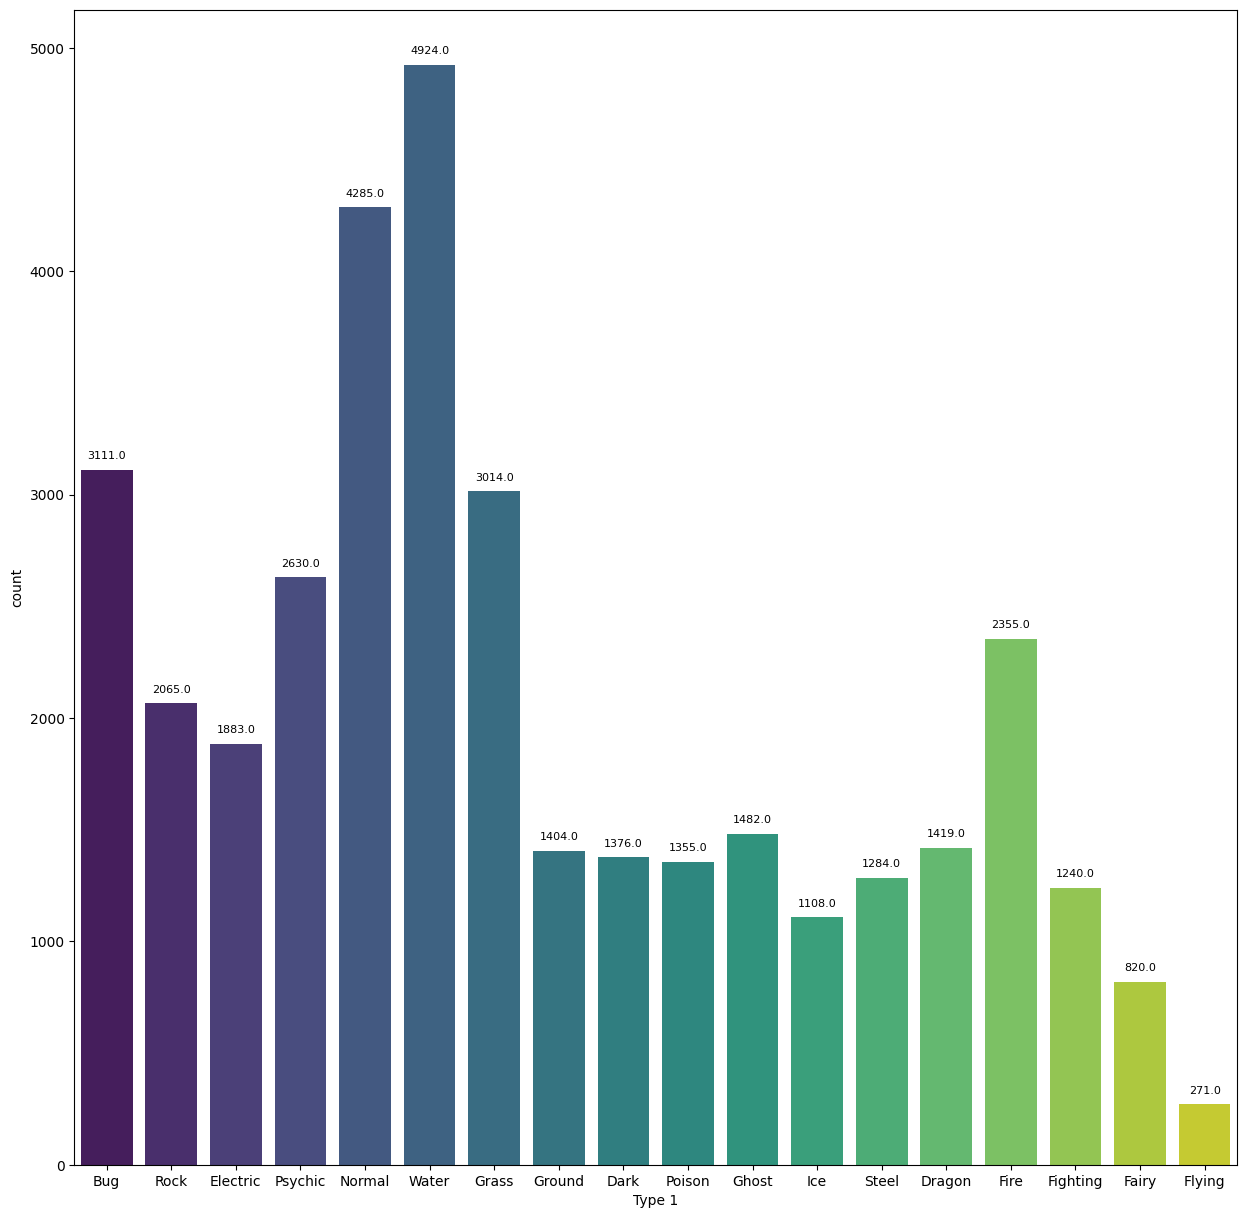

In [146]:
# Show Tyoe 1 colum values
plt.figure(figsize=(15, 15))
sns.countplot(data=data, x='Type 1', palette='viridis')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.show()

This graph can show a count of the different values Type 1 can have and a comparison between them. The Water type is predominant, while the Flying type has the lowest count.

### 🔎 1.3 - Determine which of the features have missing values. How many missing values there are for each one?

In [148]:
# Show the count of empty values in each column
data.isna().sum()

Name                  3994
Type 1                3974
Type 2               20535
HP                    4006
Attack                3897
Defense               4034
Sp. Atk               3920
Sp. Def               3982
Speed                 3972
Generation            3993
Legendary             3981
Name__other           3963
Type 1__other         4010
Type 2__other        20594
HP__other             4105
Attack__other         3995
Defense__other        4016
Sp. Atk__other        4096
Sp. Def__other        4005
Speed__other          4044
Generation__other     3986
Legendary__other      3982
Wins                     0
dtype: int64

This shows a count of all null values contained in each of the columns. All columns contain null values except Wins. This can make it difficult to adapt the dataset for training.

### 🔎 1.4 - Analize the distribution of the target column. Is it balanced?

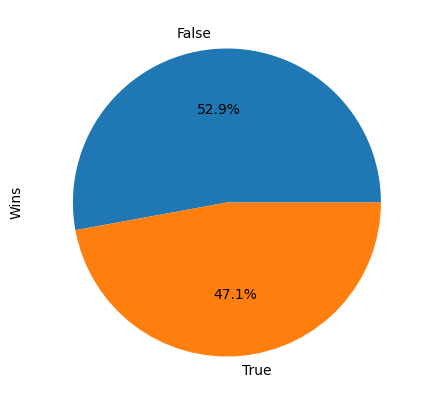

In [18]:
data['Wins'].value_counts()

plt.figure(figsize=(5,5))
data['Wins'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

This graph shows the distribution of the Wins target column. There are only two possible values, True or False, referring to whether the first pokemon beats the second or not. The data is quite balanced and there is no null value, so it is an ideal target value for the project.

## Part 2 - Preprocess the data (3 points)
Once we know how the dataset is, we can proceed with the cleaning of the data. This includes:

- Select the features that you want to use (p.e. removing too specific features). Explain why each feature is used or discarded.
- Impute the missing values. Explain why you use this imputer and not another one. If you use different imputers for different features, explain the reason why you do this.
- Encode the values of the features to work with the model you choose. This can be either encoding the categorical values, or discretizing continuous values.

### 📊 2.1 - Imput missing values

**😥 Problem**: The dataset contains empty values which can cause problems when training the model. This can negatively affect the performance of the model and lead to erroneous conclusions.

**🎯 Objective**: Fill in all or most of the empty values to get the highest possible accuracy and optimise the result.

**✨ Process**: Depending on the column to be filled, a specific process must be carried out. There is no exact science to it, so the process consists of trying different combinations and see which is the best result.

In [19]:
# Make a copy of the data
data_1 = data.copy(deep=True)

#### -> Delete rows without Name or Name__other
The processes to be carried out will depend mainly on the names of the Pokemon themselves, so removing those rows with empty names has led to a better result in the end.

In [149]:
# Delete rows with NaN in column 'Name'
data_1.dropna(subset=['Name'], inplace=True)    
data_1['Name'].isna().sum() 

0

In [150]:
# Delete rows with NaN in column 'Name__other'
data_1.dropna(subset=['Name__other'], inplace=True)     
data_1['Name__other'].isna().sum()

0

#### -> Fill statistics with the mean of the same Pokemon   
All columns with numerical data contain empty data, but some Pokemon with the same Name do have these stats assigned to them. They are very specific values for each Pokemon, but an estimation can be made by calculating the mean of all the Pokemon with the same Name that do have that statistic to assign it to those that don't have it. 

In [22]:
# Empty values in column HP    
data_1['HP'].isna().sum()

3238

In [23]:
# Calculate the mean of HP for each Name and fill the empty values    
data_1['HP'] = data_1.groupby('Name')['HP'].transform(lambda x: x.fillna(x.mean())) 
data_1['HP'].isna().sum()

0

In [24]:
# Empty values of the hole dataset    
data_1.isna().sum()

Name                     0
Type 1                3231
Type 2               16664
HP                       0
Attack                3160
Defense               3232
Sp. Atk               3151
Sp. Def               3228
Speed                 3214
Generation            3191
Legendary             3210
Name__other              0
Type 1__other         3283
Type 2__other        16660
HP__other             3303
Attack__other         3206
Defense__other        3263
Sp. Atk__other        3336
Sp. Def__other        3286
Speed__other          3294
Generation__other     3192
Legendary__other      3243
Wins                     0
dtype: int64

In [25]:
# Pokemon 1
columns_to_fill = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
data_1[columns_to_fill] = data_1.groupby('Name')[columns_to_fill].transform(lambda x: x.fillna(x.mean()))   

# Pokemon 2
columns_to_fill = ['HP__other', 'Attack__other', 'Defense__other', 'Sp. Atk__other', 'Sp. Def__other', 'Speed__other']
data_1[columns_to_fill] = data_1.groupby('Name__other')[columns_to_fill].transform(lambda x: x.fillna(x.mean()))   

# And now with filling the gaps... no empty values!
data_1.isna().sum()

Name                     0
Type 1                3231
Type 2               16664
HP                       0
Attack                   0
Defense                  0
Sp. Atk                  0
Sp. Def                  0
Speed                    0
Generation            3191
Legendary             3210
Name__other              0
Type 1__other         3283
Type 2__other        16660
HP__other                0
Attack__other            0
Defense__other           0
Sp. Atk__other           0
Sp. Def__other           0
Speed__other             0
Generation__other     3192
Legendary__other      3243
Wins                     0
dtype: int64

#### -> Fill empty Types based on Name  
Similar to the previous case, some Pokemon have neither Type 1 nor Type 2 assigned to them, but others with the same Name or Name__other do. The idea is to assign the types of these Pokemon based on the ones that do.

In [27]:
# Fill NaN values in "Type 1" and "Type 2" based on the same "Name" or "Name__other"
def fill_types(row):
    if pd.isna(row["Type 1"]) and pd.isna(row["Type 2"]):
        # Search for a Pokémon with the same "Name" that has values in "Type 1" or "Type 2"
        matching_pokemon = data_1[(data_1["Name"] == row["Name"]) & (~data_1["Type 1"].apply(lambda x: pd.isna(x)) | ~data_1["Type 2"].apply(lambda x: pd.isna(x)))]

        if not matching_pokemon.empty:
            # Copy the values of "Type 1" and "Type 2" from the first found Pokémon
            row["Type 1"] = matching_pokemon.iloc[0]["Type 1"]
            row["Type 2"] = matching_pokemon.iloc[0]["Type 2"]
        else:
            # If no matching Pokémon is found, search in "Name__other"
            matching_pokemon_other = data_1[(data_1["Name__other"] == row["Name"]) & (~data_1["Type 1__other"].apply(lambda x: pd.isna(x)) | ~data_1["Type 2__other"].apply(lambda x: pd.isna(x)))]

            if not matching_pokemon_other.empty:
                # Copy the values of "Type 1__other" and "Type 2__other" from the first found Pokémon in the second search
                row["Type 1"] = matching_pokemon_other.iloc[0]["Type 1__other"]
                row["Type 2"] = matching_pokemon_other.iloc[0]["Type 2__other"]
    
    return row

# Apply the function to each row of the DataFrame
data_1 = data_1.apply(fill_types, axis=1)

In [28]:
# Fill NaN values in "Type 1__other" and "Type 2__other" based on the same "Name__other" or "Name"
def fill_types_other(row):
    if pd.isna(row["Type 1__other"]) and pd.isna(row["Type 2__other"]):
        # Search for a Pokémon with the same "Name__other" that has values in "Type 1" or "Type 2"
        matching_pokemon_other = data_1[(data_1["Name__other"] == row["Name__other"]) & (~data_1["Type 1"].apply(lambda x: pd.isna(x)) | ~data_1["Type 2"].apply(lambda x: pd.isna(x)))]

        if not matching_pokemon_other.empty:
            # Copy the values of "Type 1" and "Type 2" from the first found Pokémon
            row["Type 1__other"] = matching_pokemon_other.iloc[0]["Type 1"]
            row["Type 2__other"] = matching_pokemon_other.iloc[0]["Type 2"]
        else:
            # If no matching_pokemon_other is found, search in matching_pokemon
            matching_pokemon = data_1[(data_1["Name"] == row["Name"]) & (~data_1["Type 1"].apply(lambda x: pd.isna(x)) | ~data_1["Type 2"].apply(lambda x: pd.isna(x)))]

            if not matching_pokemon.empty:
                # Copy the values of "Type 1" and "Type 2" from the first found Pokémon
                row["Type 1__other"] = matching_pokemon.iloc[0]["Type 1"]
                row["Type 2__other"] = matching_pokemon.iloc[0]["Type 2"]
    
    return row

# Apply the function to each row of the DataFrame
data_1 = data_1.apply(fill_types_other, axis=1)

In [29]:
# Less empty Type 1 and Type 2 (and Type 1__other and Type 2__other)
data_1.isna().sum()

Name                     0
Type 1                1552
Type 2               16362
HP                       0
Attack                   0
Defense                  0
Sp. Atk                  0
Sp. Def                  0
Speed                    0
Generation            3191
Legendary             3210
Name__other              0
Type 1__other         1661
Type 2__other        15905
HP__other                0
Attack__other            0
Defense__other           0
Sp. Atk__other           0
Sp. Def__other           0
Speed__other             0
Generation__other     3192
Legendary__other      3243
Wins                     0
dtype: int64

#### -> Type 2 from Type 1 and vice versa   
If there are still types with empty values, it means that they are assigned Type 1 or Type 2 and not both. To keep the data as intact as possible, the missing type can be copied to the other type.

In [30]:
# Fill the missing values in 'Type 2' with the corresponding values from 'Type 1' and vice versa.
data_1['Type 2'].fillna(data_1['Type 1'], inplace=True) 
data_1['Type 1'].fillna(data_1['Type 2'], inplace=True)     

data_1['Type 2__other'].fillna(data_1['Type 1__other'], inplace=True) 
data_1['Type 1__other'].fillna(data_1['Type 2__other'], inplace=True)     

In [31]:
data_1.isna().sum()

Name                    0
Type 1                  0
Type 2                  0
HP                      0
Attack                  0
Defense                 0
Sp. Atk                 0
Sp. Def                 0
Speed                   0
Generation           3191
Legendary            3210
Name__other             0
Type 1__other           0
Type 2__other           0
HP__other               0
Attack__other           0
Defense__other          0
Sp. Atk__other          0
Sp. Def__other          0
Speed__other            0
Generation__other    3192
Legendary__other     3243
Wins                    0
dtype: int64

#### -> Fill NaN Legendary values based on Name 
The Legendary column only sets whether a Pokemon is legendary or not (true or false). In the same way the data has been treated before, this missing values can be assigned based on other Pokemon with the same Name or Name__other that do have this value assigned to them.

In [32]:
# Fill NaN values in "Legendary" based on the same "Name" or "Name__other"
def fill_legendary_other(row):
    if pd.isna(row["Legendary"]):
        # Search for a Pokémon with the same "Name" that has a value in "Legendary"
        matching_pokemon = data_1[(data_1["Name"] == row["Name"]) & ~data_1["Legendary"].apply(lambda x: pd.isna(x))]

        if not matching_pokemon.empty:
            # Copy the value of "Legendary" from the first found Pokémon
            row["Legendary"] = matching_pokemon.iloc[0]["Legendary"]
        else:
            # If no matching_pokemon is found, search in "matching_pokemon_other"
            matching_pokemon_other = data_1[data_1["Name__other"] == row["Name"]]
            
            if not matching_pokemon_other.empty:
                # Copy the value of "Legendary__other" from the first found Pokémon
                row["Legendary"] = matching_pokemon_other.iloc[0]["Legendary__other"]

    return row

# Apply the function to each row of the DataFrame
data_1 = data_1.apply(fill_legendary_other, axis=1)

In [33]:
# Fill NaN values in "Legendary__other" based on the same "Name__other" or "Name"
def fill_legendary_other(row):
    if pd.isna(row["Legendary__other"]):
        # Search for a Pokémon with the same "Name__other" that has a value in "Legendary__other"
        matching_pokemon_other = data_1[(data_1["Name__other"] == row["Name__other"]) & ~data_1["Legendary__other"].apply(lambda x: pd.isna(x))]

        if not matching_pokemon_other.empty:
            # Copy the value of "Legendary__other" from the first found Pokémon
            row["Legendary__other"] = matching_pokemon_other.iloc[0]["Legendary__other"]
        else:
            # If no matching_pokemon_other is found, search in "matching_pokemon"
            matching_pokemon = data_1[data_1["Name"] == row["Name__other"]]
            
            if not matching_pokemon.empty:
                # Copy the value of "Legendary" from the first found Pokémon
                row["Legendary__other"] = matching_pokemon.iloc[0]["Legendary"]

    return row

# Apply the function to each row of the DataFrame
data_1 = data_1.apply(fill_legendary_other, axis=1)

In [34]:
# No empty Legendary anymore!    
data_1.isna().sum()

Name                    0
Type 1                  0
Type 2                  0
HP                      0
Attack                  0
Defense                 0
Sp. Atk                 0
Sp. Def                 0
Speed                   0
Generation           3191
Legendary               0
Name__other             0
Type 1__other           0
Type 2__other           0
HP__other               0
Attack__other           0
Defense__other          0
Sp. Atk__other          0
Sp. Def__other          0
Speed__other            0
Generation__other    3192
Legendary__other        0
Wins                    0
dtype: int64

### 📊 2.2 - Remove useless columns 

**😥 Problem**: Some of the existing columns are not relevant for the prediction to be made by the model. They do not provide significant information that determines whether or not a Pokemon wins a battle. It may even affect the model negatively by taking into account statistics that are not relevant to the model's prediction.

**🎯 Objective**: These columns are "Name" and "Generation", so treat these two columns is the ideal solution for the model not to take them into account.

**✨ Process**: The only possible treatment is to remove them directly so there is no need to worry any more.

In [35]:
# Make a copy of the data
data_2 = data_1.copy(deep=True)

In [36]:
# List of columns
data_2.columns.tolist()

['Name',
 'Type 1',
 'Type 2',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary',
 'Name__other',
 'Type 1__other',
 'Type 2__other',
 'HP__other',
 'Attack__other',
 'Defense__other',
 'Sp. Atk__other',
 'Sp. Def__other',
 'Speed__other',
 'Generation__other',
 'Legendary__other',
 'Wins']

In [37]:
# Column 'Name'
data_2['Name']

39087        Karrablast
45278    Mega Manectric
16398        Bouffalant
13653            Swablu
45552      Mega Diancie
              ...      
6265            Volbeat
44732            Skrelp
38158           Florges
860           Pachirisu
15795     Mega Sharpedo
Name: Name, Length: 32459, dtype: object

In [38]:
# Column 'Generation'
data_2['Generation']

39087    5.0
45278    3.0
16398    5.0
13653    3.0
45552    6.0
        ... 
6265     3.0
44732    6.0
38158    6.0
860      4.0
15795    3.0
Name: Generation, Length: 32459, dtype: float64

In [39]:
# Remove the columns that are not needed    
data_2.drop(['Name', 'Generation', 'Name__other', 'Generation__other'], axis=1, inplace=True)

In [40]:
# Final columns
data_2.columns.tolist()

['Type 1',
 'Type 2',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Legendary',
 'Type 1__other',
 'Type 2__other',
 'HP__other',
 'Attack__other',
 'Defense__other',
 'Sp. Atk__other',
 'Sp. Def__other',
 'Speed__other',
 'Legendary__other',
 'Wins']

### 📊 2.3 - Remove unfair legendary battles 

**😥 Problem**: Some fights are between a legendary Pokemon and a non-legendary Pokemon. In most of these fights, the legendary Pokemon wins because it is more powerful than the other Pokemon. These fights can negatively affect the model, as it is the fact that it is legendary that determines whether it wins the fight or not, thus resulting in an unfair fight.

**🎯 Objective**: These unfair fights need to be dealt with so that they are not so relevant to the trained model.

**✨ Process**: The best solution is to remove these ranks containing one legendary Pokemon and one non-legendary Pokemon, so that it does not result in very unstable battles.

In [41]:
# Make a copy of the data
data_3 = data_2.copy(deep=True)

In [42]:
count_legendary = (
    (data_3['Legendary'] == True) & (data_3['Legendary__other'] == False) |
    (data_3['Legendary'] == False) & (data_3['Legendary__other'] == True)).sum()

print(f'Number of columns with only one Legendary or Legendary__other is True: {count_legendary}')

Number of columns with only one Legendary or Legendary__other is True: 4916


In [43]:
# Condition to the rows to remove
condition_to_remove = (
    (data_3['Legendary'] == True) & (data_3['Legendary__other'] == False) |
    (data_3['Legendary'] == False) & (data_3['Legendary__other'] == True)
)

# Filter the rows that do not fulfil the condition
data_3 = data_3.loc[~condition_to_remove]

# Show the count of rows that fulfil the condition. No one!
data_3.loc[condition_to_remove].count()

Type 1              0
Type 2              0
HP                  0
Attack              0
Defense             0
Sp. Atk             0
Sp. Def             0
Speed               0
Legendary           0
Type 1__other       0
Type 2__other       0
HP__other           0
Attack__other       0
Defense__other      0
Sp. Atk__other      0
Sp. Def__other      0
Speed__other        0
Legendary__other    0
Wins                0
dtype: int64

### 📊 2.4 - Remove outliers 

**😥 Problem**: Outliers are atypical values that deviate significantly from the majority of data points in a dataset, potentially distorting statistical analyses and models. Any dataset may have outliers that stand out from the mean, and it is important to take these into account when training a model.

**🎯 Objective**: It is necessary to check which outliers are contained in the dataset and remove those lines containing these outliers to optimise the model output.

**✨ Process**: Percentile capping in data involves setting a threshold to limit extreme values, often by capping data points beyond a certain percentile to mitigate the impact of outliers on statistical analyses or models.

In [44]:
# Make a copy of the data   
data_4 = data_3.copy(deep=True)

In [45]:
# Take just numerical columns    
numeric_columns = data_4.select_dtypes(include=np.number).columns    

Q1 = data_4[numeric_columns].quantile(0.10)  # Percentil 5
Q3 = data_4[numeric_columns].quantile(0.90)  # Percentil 95
IQR = Q3 - Q1

print(IQR)

HP                60.000000
Attack            82.000000
Defense           75.000000
Sp. Atk           76.000000
Sp. Def           66.000000
Speed             74.000000
HP__other         59.325536
Attack__other     80.000000
Defense__other    73.000000
Sp. Atk__other    76.000000
Sp. Def__other    66.000000
Speed__other      74.000000
dtype: float64


In [46]:
# Apply percentiles to the data    
data_4_pc = data_4[~((data_4[numeric_columns] < (Q1 - 1.5 * IQR)) |(data_4[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [47]:
i, _ = data_4.shape
o, _ = data_4_pc.shape
print("Removed", i-o,"rows")
print("Rows count reduced from", i, "to", o,"resulting in", int((o/i)*100), "% of the initial rows" )

Removed 463 rows
Rows count reduced from 27543 to 27080 resulting in 98 % of the initial rows


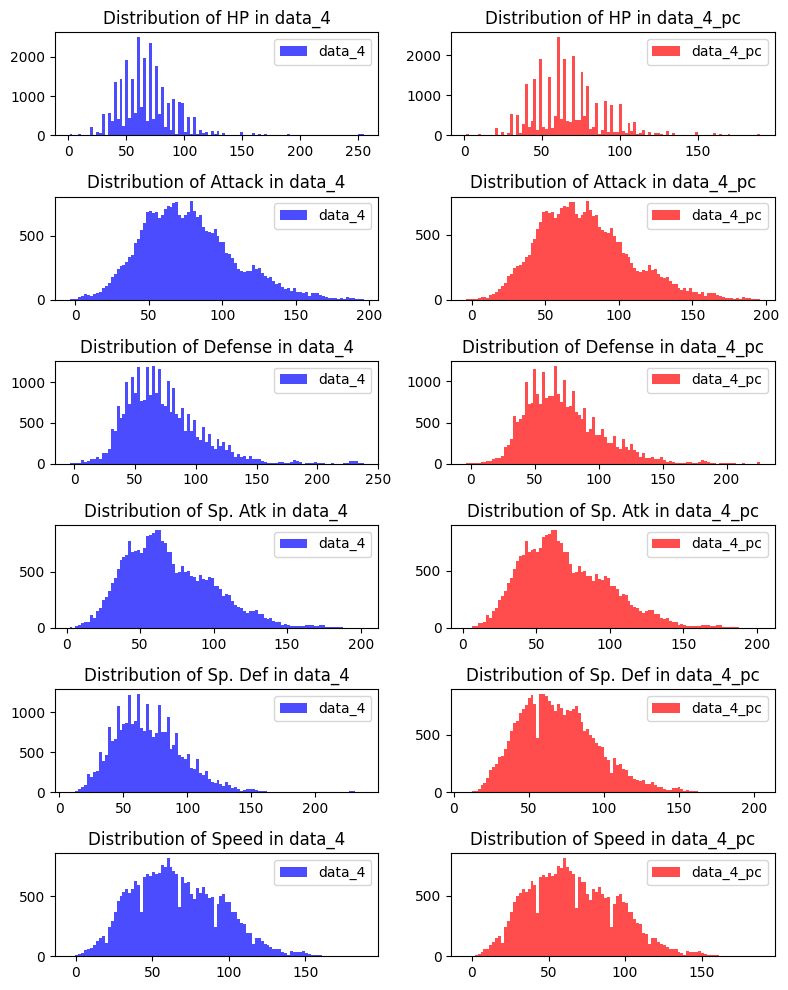

In [50]:
# Pokemon 1
# Comparation between the columns with outliers (blue) and the columns without outliers (red)

# List of columns to compare
columns_to_compare = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Plot configuration
fig, axes = plt.subplots(nrows=len(columns_to_compare), ncols=2, figsize=(8, 10))

# Iterate over columns and compare distributions
for i, col in enumerate(columns_to_compare):
    # Histogram for data_4
    axes[i, 0].hist(data_4[col], bins=100, color='b', alpha=0.7, label='data_4')
    axes[i, 0].set_title(f'Distribution of {col} in data_4')
    axes[i, 0].legend()

    # Histogram for data_4_pc
    axes[i, 1].hist(data_4_pc[col], bins=100, color='r', alpha=0.7, label='data_4_pc')
    axes[i, 1].set_title(f'Distribution of {col} in data_4_pc')
    axes[i, 1].legend()

# Design adjustments
plt.tight_layout()
plt.show()

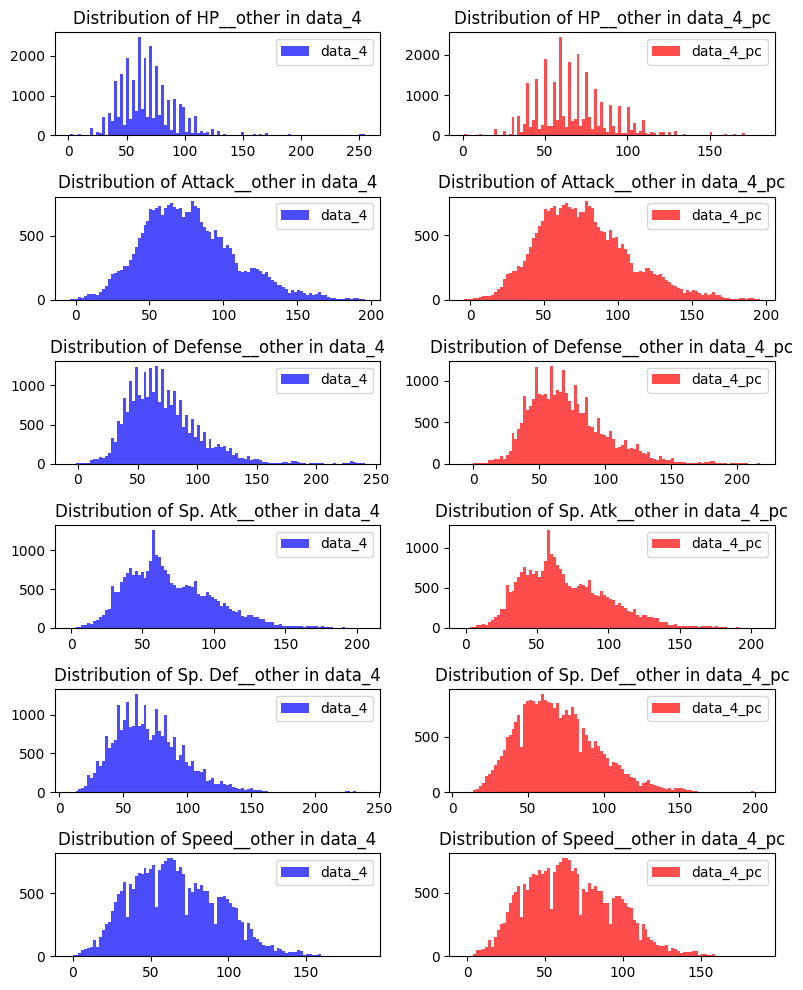

In [51]:
# Pokemon 2
# Comparation between the columns with outliers (blue) and the columns without outliers (red)

# List of columns to compare
columns_to_compare = ['HP__other', 'Attack__other', 'Defense__other', 'Sp. Atk__other', 'Sp. Def__other', 'Speed__other']

# Plot configuration
fig, axes = plt.subplots(nrows=len(columns_to_compare), ncols=2, figsize=(8, 10))

# Iterate over columns and compare distributions
for i, col in enumerate(columns_to_compare):
    # Histogram for data_4
    axes[i, 0].hist(data_4[col], bins=100, color='b', alpha=0.7, label='data_4')
    axes[i, 0].set_title(f'Distribution of {col} in data_4')
    axes[i, 0].legend()

    # Histogram for data_4_pc
    axes[i, 1].hist(data_4_pc[col], bins=100, color='r', alpha=0.7, label='data_4_pc')
    axes[i, 1].set_title(f'Distribution of {col} in data_4_pc')
    axes[i, 1].legend()

# Design adjustments
plt.tight_layout()
plt.show()

### 📊 2.5 - Change object and bool per float

**😥 Problem**: The models to be used require the data to have numerical values only, it cannot process strings, bool or other variable types.

**🎯 Objective**: The idea is to modify the columns whose values are not float so that the model can process the data.

**✨ Process**: Columns with bool values can be changed to True = 1 and False = 0, while Pokemon type columns contain more than one object value, so each type must be assigned a number. This process should not affect the behaviour of the model in any way.

In [54]:
# Make a copy of the data    
data_5 = data_4_pc.copy(deep=True)

In [55]:
# Change object and bool columns
data_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27080 entries, 39087 to 15795
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type 1            27080 non-null  object 
 1   Type 2            27080 non-null  object 
 2   HP                27080 non-null  float64
 3   Attack            27080 non-null  float64
 4   Defense           27080 non-null  float64
 5   Sp. Atk           27080 non-null  float64
 6   Sp. Def           27080 non-null  float64
 7   Speed             27080 non-null  float64
 8   Legendary         27080 non-null  bool   
 9   Type 1__other     27080 non-null  object 
 10  Type 2__other     27080 non-null  object 
 11  HP__other         27080 non-null  float64
 12  Attack__other     27080 non-null  float64
 13  Defense__other    27080 non-null  float64
 14  Sp. Atk__other    27080 non-null  float64
 15  Sp. Def__other    27080 non-null  float64
 16  Speed__other      27080 non-null  fl

In [56]:
# Columns to change to float
columns_to_convert = ['Legendary', 'Legendary__other', 'Wins']

# Change True to 1 and False to 0 in the selected columns
data_5[columns_to_convert] = data_5[columns_to_convert].astype(float)

# See results
data_5[columns_to_convert].head()

,Legendary,Legendary__other,Wins
39087,0.0,0.0,1.0
45278,0.0,0.0,1.0
16398,0.0,0.0,0.0
13653,0.0,0.0,0.0
14290,0.0,0.0,1.0


In [57]:
data_5['Type 1'].value_counts()

Water       3740
Normal      3248
Grass       2387
Bug         2295
Psychic     1749
Fire        1706
Rock        1491
Electric    1395
Poison      1172
Ghost       1102
Ground      1094
Fighting    1071
Dark        1005
Steel        917
Ice          834
Dragon       788
Fairy        671
Flying       415
Name: Type 1, dtype: int64

In [58]:
type_mapping = {
    "Water": 1,
    "Normal": 2,
    "Bug": 3,
    "Grass": 4,
    "Fire": 5,
    "Psychic": 6,
    "Rock": 7,
    "Electric": 8,
    "Ghost": 9,
    "Poison": 10,
    "Dark": 11,
    "Ground": 12,
    "Fighting": 13,
    "Steel": 14,      
    "Dragon": 15,
    "Ice": 16,
    "Fairy": 17,
    "Flying": 18,
}

# Replace the objects of these columns by his matching number
data_5 = data_5.replace({
    'Type 1': type_mapping,
    'Type 2': type_mapping, 
    'Type 1__other': type_mapping, 
    'Type 2__other': type_mapping
    })

In [59]:
columns_to_convert = ['Type 1', 'Type 2', 'Type 1__other', 'Type 2__other']    
data_5[columns_to_convert] = data_5[columns_to_convert].astype(float)   

# Finally, every column is float
data_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27080 entries, 39087 to 15795
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type 1            27080 non-null  float64
 1   Type 2            27080 non-null  float64
 2   HP                27080 non-null  float64
 3   Attack            27080 non-null  float64
 4   Defense           27080 non-null  float64
 5   Sp. Atk           27080 non-null  float64
 6   Sp. Def           27080 non-null  float64
 7   Speed             27080 non-null  float64
 8   Legendary         27080 non-null  float64
 9   Type 1__other     27080 non-null  float64
 10  Type 2__other     27080 non-null  float64
 11  HP__other         27080 non-null  float64
 12  Attack__other     27080 non-null  float64
 13  Defense__other    27080 non-null  float64
 14  Sp. Atk__other    27080 non-null  float64
 15  Sp. Def__other    27080 non-null  float64
 16  Speed__other      27080 non-null  fl

### 🌟 Conclusion  
After several optimisation processes, the dataset is ready to train a model and test it. There are thousands of different ways to treat the data to obtain better results, but the ones that have been carried out have been selected to show the best accuracy obtained in this project.

## Part 3 - Training your model (3 points)
In this part you have to train a **classifier** model to predict if a Pokemon will win or not a battle against another Pokemon. For this, you should explore at least 3 different classifiers.

You have to train and evaluate those classifiers using cross-validation in order to select the best one. Then, you should also study the results of the model (overfit, underfit, possible bias...).

1. Train (at least) 3 different classifiers
2. Evaluate the 3 classifiers using cross-validation. Select the best model according to this metric.
3. For the selected model: 
   1. Get the accuracy for data not seen during the training process
   2. Plot the confusion matrix
   3. Analize the results of accuracy and the confusion matrix

In [60]:
# Make a copy of the data
data_final = data_5.copy(deep=True)

In [61]:
# Train-test split    
x = data_final.drop(['Wins'], axis=1)
y = data_final['Wins']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

### ⚡ 3.1 - Logistic Regression
Logistic regression is a statistical method used for binary classification, predicting the probability of an observation belonging to a particular category based on input features, and it utilizes the logistic function to transform linear combinations of features into probabilities.

In [96]:
# Load model    
# lr = LogisticRegression(penalty = 'l2', C = 10, random_state = 0)
lr = LogisticRegression(random_state=40)
print(lr.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 40, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [97]:
lr.fit(x_train,y_train)

C:\Users\ruben\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=40)

In [98]:
# First test prediction    
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: {:d}%'.format(int(accuracy * 100)))

Accuracy: 82%


In [108]:
# Cross validation
scores = cross_val_score(lr, x_train, y_train, cv=10)
print("Accuracy: {:d}%".format(int(scores.mean() * 100)))

C:\Users\ruben\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ruben\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

Accuracy: 83%


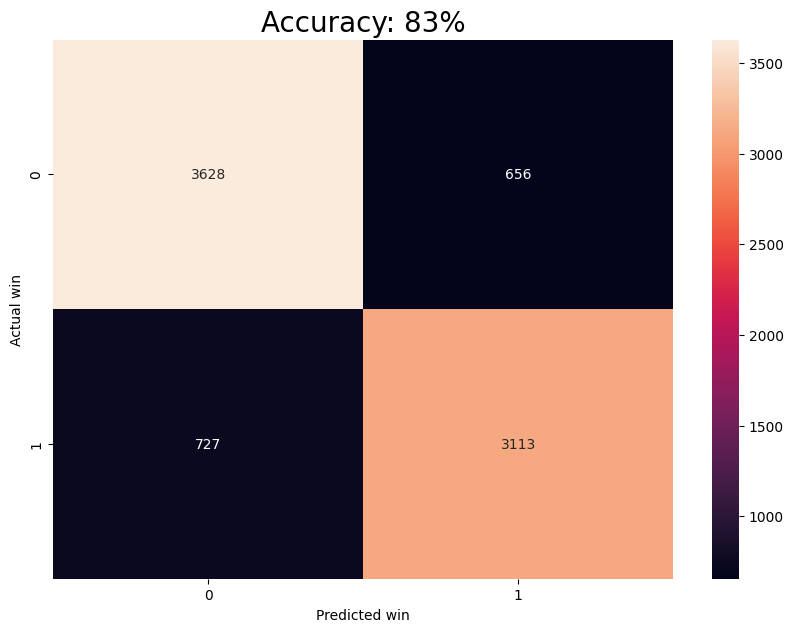

In [109]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f")
plt.xlabel('Predicted win')
plt.ylabel('Actual win')
plt.title('Accuracy: {:d}%'.format(int(scores.mean() * 100)), size = 20)
plt.show()

### ⚡ 3.2 - Decision Tree

Decision Tree is a machine learning algorithm that makes decisions by recursively splitting the dataset based on features, creating a tree-like structure where each internal node represents a decision based on a feature, and each leaf node represents the final predicted outcome.

In [111]:
# Load model    

#dt = DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=3)
# dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
# max_features=None, max_leaf_nodes=None,
# min_samples_leaf=1,
# min_samples_split=2, min_weight_fraction_leaf=0.0,
# random_state=None, splitter='best')
dt = DecisionTreeClassifier(criterion='gini',splitter='best')
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [112]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [113]:
# Show tree (extremely slow to charge)

# tree.plot_tree(dt)
# plt.show()

In [114]:
# Fisrt test prediction    
y_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: {:d}%'.format(int(accuracy * 100)))

Accuracy: 80%


In [115]:
# Cross validation
scores = cross_val_score(dt, x_train, y_train, cv=10)
print("Accuracy: {:d}%".format(int(scores.mean() * 100)))

Accuracy: 80%


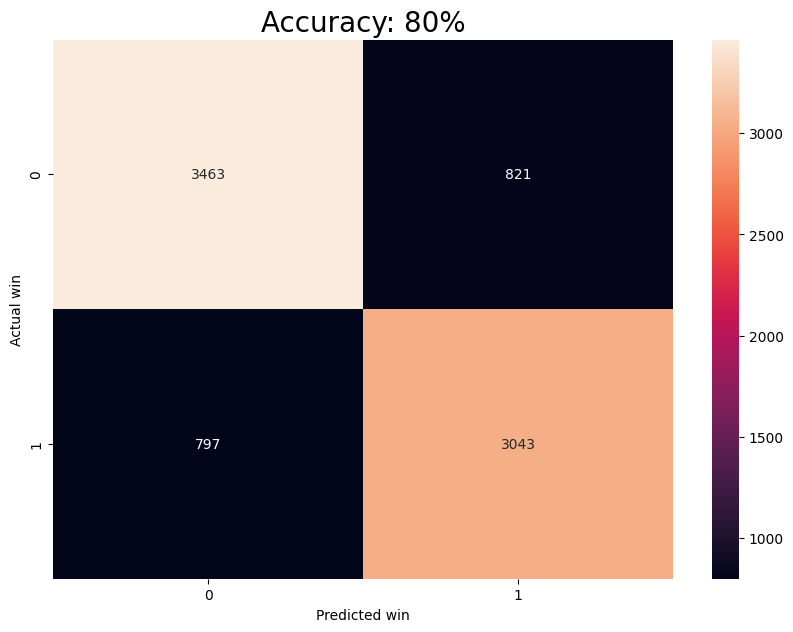

In [116]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f")
plt.xlabel('Predicted win')
plt.ylabel('Actual win')
plt.title('Accuracy: {:d}%'.format(int(scores.mean() * 100)), size = 20)
plt.show()

### ⚡ 3.3 - Random Forest

Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or the average prediction (regression) of the individual trees, providing improved accuracy and robustness compared to a single decision tree.

In [92]:
#rfc = RandomForestClassifier(n_estimators = 100, max_features = 'sqrt', max_depth= 200, bootstrap=False, random_state=0) 
rfc = RandomForestClassifier(n_estimators=1000, random_state=0)
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [93]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [ ]:
# Show tree (extremely slow to charge)

# fig = plt.figure(figsize=(15, 10))
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
# plot_tree(rfc.estimators_[0],  
#           filled=True, impurity=True, 
#           rounded=True)

In [94]:
# First test prediction    
y_pred_rfc = rfc.predict(x_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print('Accuracy: {:d}%'.format(int(accuracy_rfc * 100)))

Accuracy: 87%


In [117]:
# Cross validation
scores = cross_val_score(rfc, x_train, y_train, cv=10)
print("Accuracy: {:d}%".format(int(scores.mean() * 100)))

Accuracy: 87%


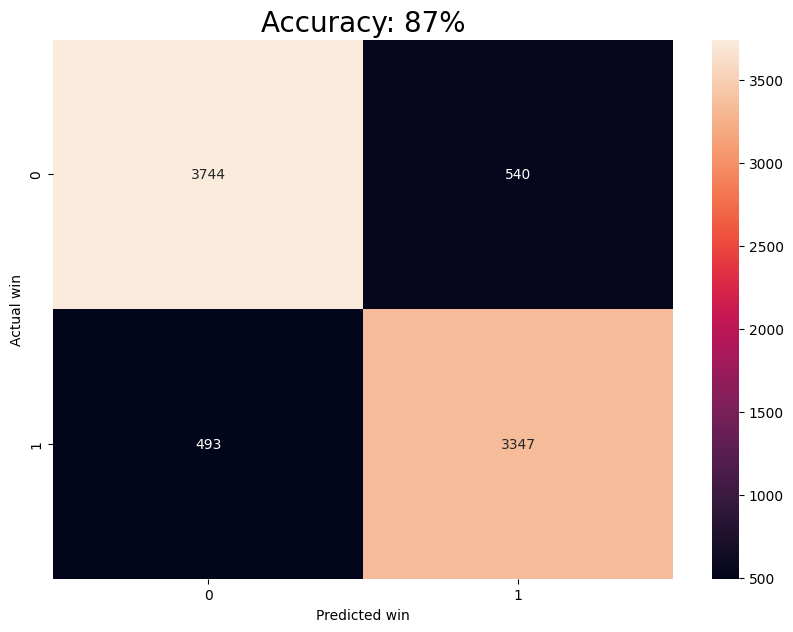

In [118]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, fmt=".0f")
plt.xlabel('Predicted win')
plt.ylabel('Actual win')
plt.title('Accuracy: {:d}%'.format(int(scores.mean() * 100)), size = 20)
plt.show()

### 🌟 Conclusion  
An accuracy of 87% is very appropriate for this dataset. With this we can conclude that the changes in the data have been sufficiently relevant to improve the model output.

🥇 Random Forest: **87%** <br>
🥈 Logistic Regression: 83% <br>
🥉 Decision Tree: 80% <br>


## Part 4 (Optional) - Create an ensemble and configure the model

You have trained different classifiers but selected only one of them as "the best" one. Maybe instead of having the models competing between them, having them to colaborate would yield better results. 

We propose you to create an ensemble of the different classifiers explored in *Part 3*. You should compare the ensemble with the individual models using cross-validation, and then get the final accuracy and the confusion matrix for the ensemble.
As a bonus, try to tune the parameters of this ensemble using either `GridSearchCV` or `RandomizedSearchCV`.

1. Train an ensemble with the classifiers in *Part 3*.
2. Compare the performance of this ensemble using cross-validation, the final accuracy, and the confusion matrix. Analyze the results.
3. Fine-tune the hyper-parameters of the ensemble using `GridSearchCV` or `RandomizedSearchCV`.

In [119]:
from sklearn.ensemble import VotingClassifier

# Logistic regression, decision tree y random forest
ensemble = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('rf', rfc)], voting='hard')

# Train all models together
ensemble.fit(x_train, y_train)

C:\Users\ruben\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=40)),
                             ('dt', DecisionTreeClassifier()),
                             ('rf',
                              RandomForestClassifier(n_estimators=1000,
                                                     random_state=0))])

In [120]:
# Cross validation
cv_scores = cross_val_score(ensemble, x_train, y_train, cv=10, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

C:\Users\ruben\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ruben\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

Cross-Validation Scores: [0.86075949 0.86656118 0.86445148 0.86814346 0.86708861 0.86445148
 0.85435356 0.86807388 0.86015831 0.87387863]
Mean Accuracy: 0.8647920076149761


Final Accuracy of Ensemble: 0.8632447070408665
Confusion Matrix of Ensemble:
 [[3716  568]
 [ 543 3297]]


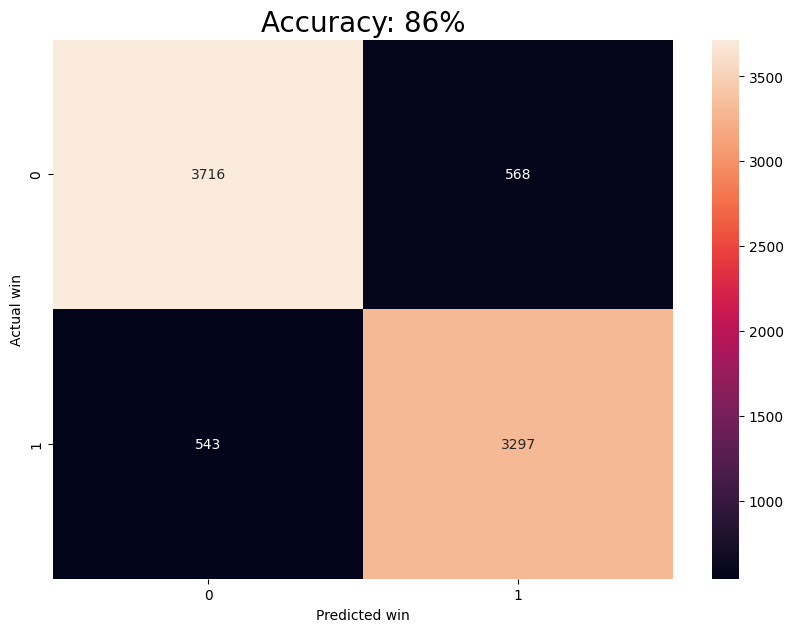

In [123]:
# Making predictions on the test set
y_pred_ensemble = ensemble.predict(x_test)

# Calculate the final accuracy
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print("Final Accuracy of Ensemble:", accuracy_ensemble)

# Calculate confusion matrix
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
print("Confusion Matrix of Ensemble:\n", conf_matrix_ensemble)  

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_ensemble), annot=True, fmt=".0f")
plt.xlabel('Predicted win')
plt.ylabel('Actual win')
plt.title('Accuracy: {:d}%'.format(int(accuracy_ensemble * 100)), size = 20)
plt.show()

In [124]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'lr__C': [0.1, 1, 10],              # Logistic Regression hyperparameters
    'dt__max_depth': [None, 10, 20],    # Decision Tree hyperparameters
    'rf__n_estimators': [50, 100, 200]  # Random Forest hyperparameters
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=ensemble, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

C:\Users\ruben\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ruben\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

Best Hyperparameters: {'dt__max_depth': 10, 'lr__C': 1, 'rf__n_estimators': 200}


### 🌟 Conclusion 
Accuracy obtained: **86%**

Best Hyperparameters:
- dt__max_depth: 10
- lr__C: 1
- rf__n_estimators: 200

## Part 5 - Wrap-up (2 points)
The final part of this assignment is to wrap-up your classifier into a pipeline. This pipeline will execute the entire process:

- Preprocess the data
    - Select features
    - Impute data
    - Encode values
- The classifier selected in *Part 3* (or the ensemble if it is better)

This pipeline will be used in the other provided notebook to generate the predictions for the combats you have to submit.

To ensure everything works as expected, we recommend you to load the dataset again before using it with the pipeline. You should also compare the accuracy and the confusion matrix from the pipeline with the model trained before. **Remember to set the random state to all the required transformers and estimators to have a constant output**.

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [128]:
numeric_features = ["Type 1", "Type 2", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Legendary",
                    "Type 1__other", "Type 2__other", "HP__other", "Attack__other", "Defense__other", "Sp. Atk__other", "Sp. Def__other", "Speed__other", "Legendary__other",
                    "Wins"]

In [133]:
# Define las transformaciones para datos numéricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [134]:
# Combina las transformaciones
preprocessor = numeric_transformer

# Crea el pipeline con el preprocesamiento y el clasificador o ensemble
mypipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', ensemble)  # Reemplaza ensemble con tu modelo seleccionado o ensemble
])

In [135]:
# Entrena el pipeline en tus datos
mypipeline.fit(x_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_pipeline = mypipeline.predict(x_test)

In [136]:
# Calcular la precisión final
accuracy_pipeline = accuracy_score(y_test, y_pred_pipeline)
print("Final Accuracy of Pipeline:", accuracy_pipeline)

# Calcular la matriz de confusión
conf_matrix_pipeline = confusion_matrix(y_test, y_pred_pipeline)
print("Confusion Matrix of Pipeline:\n", conf_matrix_pipeline)

Final Accuracy of Pipeline: 0.8645987198424422
Confusion Matrix of Pipeline:
 [[3723  561]
 [ 539 3301]]


In [140]:
import joblib

# Guarda el pipeline en un archivo
joblib.dump(mypipeline, 'mypipeline.pkl')

['mypipeline.pkl']

### 🌟 Conclusion 
...